<center>
<h1>Deep Learning with Python - Francois Chollet</h1>
<h2> Chapter 04 - Regression</h2>
</center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import KFold

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


### Pre-processing

In [3]:
def pre_processing(X):
    
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    return X


train_data = pre_processing(train_data)
test_data = pre_processing(test_data)

# mean = np.mean(train_data, axis=0)
# std = np.std(train_data, axis=0)
# test_data = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)
# test_data = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)

# Chollet usou train_data pra fazer o pre-processamento da test_data
# O raciocíno é: não há diferença significantemente estatística entre os valores, 
# então normalizar de um jeito ou de outro não impactaria. Isso não configura data leakeage 
# porque não estamos utilizando isso para ajustar os pesos

In [4]:
inputs = keras.Input(shape=(13,), name="prices")
features = layers.Dense(64, activation="relu")(inputs)
features = layers.Dense(64, activation="relu")(features)
outputs = layers.Dense(1)(features)

model = keras.Model(inputs=inputs, outputs=outputs, name="Regression_Model_01")
model.compile(optimizer="rmsprop", loss="mse", metrics="mae")

# loss_dict = {}
# metrics_dict = {}
# input_data = {"prices": }
# target_data = {}
# validation_data = {}

In [5]:
model.summary()

Model: "Regression_Model_01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prices (InputLayer)         [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


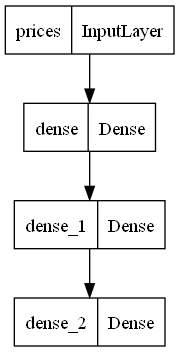

In [6]:
keras.utils.plot_model(model)

In [7]:
kfolds = KFold(n_splits=4, shuffle=True).split(train_data, train_targets)
histories = []

for fold, (train, validation) in enumerate(kfolds):
    
    print(f"Processing fold #{fold}")
    
    history = model.fit(
        train_data[train],
        train_targets[train],
        epochs=130,
        batch_size=16,
        validation_data=(train_data[validation], train_targets[validation]),
        verbose=False,
    )

    histories.append(history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [8]:
mean_training_loss = np.mean([h.history["loss"] for h in histories], axis=0)
mean_training_mae = np.mean([h.history["mae"] for h in histories], axis=0)

mean_validation_loss = np.mean([h.history["val_loss"] for h in histories], axis=0)
mean_validation_mae = np.mean([h.history["val_mae"] for h in histories], axis=0)

epochs = range(1, len(history.epoch) + 1)

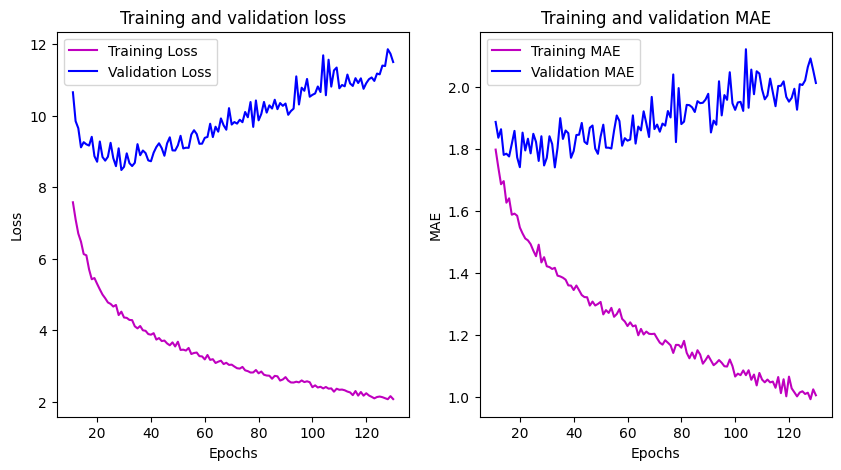

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(epochs[10:], mean_training_loss[10:], "m", label="Training Loss")
axes[0].plot(epochs[10:], mean_validation_loss[10:], "b", label="Validation Loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(epochs[10:], mean_training_mae[10:], "m", label="Training MAE")
axes[1].plot(epochs[10:], mean_validation_mae[10:], "b", label="Validation MAE")
axes[1].set_title("Training and validation MAE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

plt.show()

In [16]:
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=130,
    batch_size=16,
    verbose=False,
)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.4602 - mae: 2.7346


In [19]:
print(test_mae_score)
print(test_mse_score)

2.734560489654541
15.460192680358887
